# Project
## PART-A 30 Marks
### DOMAIN: Medical
#### • CONTEXT: 
Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team. 
Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for 
developing a AIML model which can predict the condition of the patient depending on the received test results.
#### • DATA DESCRIPTION: 
The data consists of biomechanics features of the patients according to their current conditions. Each patient is 
represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part. 
#### • PROJECT OBJECTIVE: 
To Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised 
Learning algorithms.
##### • STEPS AND TASK [30 Marks]

### 1. Data Understanding: [5 Marks]

A. Read all the 3 CSV files as DataFrame and store them into 3 separate variables. [1 Mark]

B. Print Shape and columns of all the 3 DataFrames. [1 Mark]

C. Compare Column names of all the 3 DataFrames and clearly write observations. [1 Mark]

D. Print DataTypes of all the 3 DataFrames. [1 Mark]

E. Observe and share variation in ‘Class’ feature of all the 3 DaraFrames. [1 Mark]


In [1]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from scipy.stats import uniform
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

#### A. Read all the 3 CSV files as DataFrame and store them into 3 separate variables. [1 Mark]

In [3]:

# Read CSV files into DataFrames
df1=pd.read_csv("Normal.csv")
df2=pd.read_csv("Type_H.csv")
df3=pd.read_csv("Type_S.csv")

In [4]:
print(df1)
print(df2)
print(df3)

    P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0     38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1     54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2     44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3     48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4     45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal
..          ...        ...        ...        ...         ...       ...     ...
95    47.903565  13.616688  36.000000  34.286877  117.449062 -4.245395  Normal
96    53.936748  20.721496  29.220534  33.215251  114.365845 -0.421010  Normal
97    61.446597  22.694968  46.170347  38.751628  125.670725 -2.707880  Normal
98    45.252792   8.693157  41.583126  36.559635  118.545842  0.214750  Normal
99    33.841641   5.073991  36.641233  28.767649  123.945244 -0.199249  Normal

[100 rows x 7 columns]
    P_incidence     P_tilt  

#### B. Print Shape and columns of all the 3 DataFrames. [1 Mark]

In [5]:
# creating a function to print the shape and columns of the dataframes
def print_info_for_dataframes(dataframes):
    for i, df in enumerate(dataframes,start=1):
        #Printing information of the dataframe
        print(f"Dataframe df{i}:")
        print("Shape: ", df.shape)
        print("Coloumns: ",df.columns)
        print("\n" + "="*40 + "\n")  # Separator between DataFrames

In [6]:
#Creating a list of dataframes
dataframes_list=[df1,df2,df3]

In [7]:
#Calling the function with the list of dataframes
print_info_for_dataframes(dataframes_list)

Dataframe df1:
Shape:  (100, 7)
Coloumns:  Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


Dataframe df2:
Shape:  (60, 7)
Coloumns:  Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


Dataframe df3:
Shape:  (150, 7)
Coloumns:  Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')




#### C. Compare Column names of all the 3 DataFrames and clearly write observations. [1 Mark]

In [8]:
# Extracting column names from each DataFrame
columns_df1 = set(df1.columns)
columns_df2 = set(df2.columns)
columns_df3 = set(df3.columns)

In [9]:
#Finding common column names
common_columns=columns_df1.intersection(columns_df2,columns_df3)

In [10]:
# Finding unique column names for each DataFrame
unique_columns_df1=columns_df1-common_columns
unique_columns_df2=columns_df2-common_columns
unique_columns_df3=columns_df3-common_columns

In [11]:
# Printing observations
print("Common Column Names:", common_columns)
print("\n")
print("Unique Column Names for DataFrame 1:", unique_columns_df1)
print("Unique Column Names for DataFrame 2:", unique_columns_df2)
print("Unique Column Names for DataFrame 3:", unique_columns_df3)

Common Column Names: {'Class', 'P_tilt', 'P_incidence', 'P_radius', 'L_angle', 'S_slope', 'S_Degree'}


Unique Column Names for DataFrame 1: set()
Unique Column Names for DataFrame 2: set()
Unique Column Names for DataFrame 3: set()


# Observations
The column names across all three DataFrames are identical, indicating consistency in the types of measurements or observations by each DataFrame.

The presence of the 'Class' column suggests that these DataFrames might be related to classification tasks, as it typically represents the target variable.

The sizes of the DataFrames vary, with df1 having 100 rows, df2 having 60 rows, and df3 having 150 rows. This difference in size might be important depending on the analysis.

All DataFrames have 7 columns and are of the same datatype ('object'), suggesting uniformity in data types.

These observations indicate that the three DataFrames have a common set of features with consistent column names and types, but they differ in the number of observations (rows).

#### D. Print DataTypes of all the 3 DataFrames. [1 Mark ]

In [12]:
# creating a function to print the datatypes of the dataframes
def print_data_types(dataframes):
    for i, df in enumerate(dataframes, start=1):
        # Print DataFrame details
        print(f"Data Types for DataFrame df{i}:")
        print(df.dtypes)
        print("\n" + "="*40 + "\n")  # Separator between DataFrames

In [13]:
# Calling the function with the list of DataFrames
print_data_types(dataframes_list)

Data Types for DataFrame df1:
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


Data Types for DataFrame df2:
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


Data Types for DataFrame df3:
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object




#### E. Observe and share variation in ‘Class’ feature of all the 3 DaraFrames. [1 Mark ]

In [14]:
# creating a function to observe and print variation of the dataframes
def observe_value_variation(dataframes):
    for i,df in enumerate(dataframes, start=1):
        #Print  Dataframe details
        print(f"Class variation for dataframe df{i}:")
        class_counts=df['Class'].value_counts()
        print(class_counts)
        print("\n"+"="*40+"\n") # Separator between DataFrames

In [15]:
# Calling the function to observe the variation for column"Class"
observe_value_variation(dataframes_list)

Class variation for dataframe df1:
Normal    73
Nrmal     27
Name: Class, dtype: int64


Class variation for dataframe df2:
Type_H    37
type_h    23
Name: Class, dtype: int64


Class variation for dataframe df3:
Type_S    133
tp_s       17
Name: Class, dtype: int64




### 2. Data Preparation and Exploration: [5 Marks]

A. Unify all the variations in ‘Class’ feature for all the 3 DataFrames. [1 Marks]

For Example: ‘tp_s’, ‘Type_S’, ‘type_s’ should be converted to ‘type_s’

B. Combine all the 3 DataFrames to form a single DataFrame [1 Marks]

Checkpoint: Expected Output shape = (310,7)

C. Print 5 random samples of this DataFrame [1 Marks]

D. Print Feature-wise percentage of Null values. [1 Mark]

E. Check 5-point summary of the new DataFrame. [1 Mark]

#### A. Unify all the variations in ‘Class’ feature for all the 3 DataFrames. [1 Marks]

In [16]:
# creating a function unify the class variations of the dataframes
def unify_class_variations(dataframes):
    for i, df in enumerate(dataframes, start=1):
        # Print unique values in 'Class' column before replacements
        print(f"Unique Class Values Before Replacement for DataFrame df{i}:")
        print(df['Class'].unique())
        
        # Remove leading and trailing whitespaces from 'Class' column
        df['Class'] = df['Class'].str.strip()
        
        # Replace specific variations in 'Class' column
        replacements = {'nrml': 'Normal', 'Nrmal':'Normal', 'type_h': 'Type_H', 'tp_s': 'Type_S'}
        df['Class'] = df['Class'].replace(replacements)
        
        # Verify the unified 'Class' values
        unified_classes = df['Class'].unique()
        print(f"\nUnified Class Values for DataFrame df{i}: {unified_classes}\n")
        
        # Print DataFrame details
        print(f"Class Variation for DataFrame df{i}:")
        class_counts = df['Class'].value_counts()
        print(class_counts)
        print("\n" + "="*40 + "\n")  # Separator between DataFrames


In [17]:
#Calling the function to unify the names in dataframes
unify_class_variations(dataframes_list)

Unique Class Values Before Replacement for DataFrame df1:
['Normal' 'Nrmal']

Unified Class Values for DataFrame df1: ['Normal']

Class Variation for DataFrame df1:
Normal    100
Name: Class, dtype: int64


Unique Class Values Before Replacement for DataFrame df2:
['Type_H' 'type_h']

Unified Class Values for DataFrame df2: ['Type_H']

Class Variation for DataFrame df2:
Type_H    60
Name: Class, dtype: int64


Unique Class Values Before Replacement for DataFrame df3:
['Type_S' 'tp_s']

Unified Class Values for DataFrame df3: ['Type_S']

Class Variation for DataFrame df3:
Type_S    150
Name: Class, dtype: int64




#### B. Combine all the 3 DataFrames to form a single DataFrame [1 Marks]

In [18]:
# Combining all DataFrames into a single DataFrame
combined_df = pd.concat([df1, df2, df3], ignore_index=True)

In [19]:
# Printing information about the combined DataFrame
print("Combined DataFrame:")
print("Shape:", combined_df.shape)
print("Columns:", combined_df.columns)

Combined DataFrame:
Shape: (310, 7)
Columns: Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


In [20]:
combined_df.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


#### C. Print 5 random samples of this DataFrame [1 Marks]


In [21]:
# Printing 5 random samples from the combined DataFrame
random_samples=combined_df.sample(n=5)
print("5 Random samples from the combined DataFrame: ")
print(random_samples)

5 Random samples from the combined DataFrame: 
     P_incidence     P_tilt    L_angle    S_slope    P_radius    S_Degree  \
271    78.401254  14.042260  79.694263  64.358994  104.731234   12.392853   
77     33.041688  -0.324678  19.071075  33.366366  120.388611    9.354365   
257    44.216464   1.507075  46.110339  42.709390  108.629567   42.810481   
203    49.782121   6.466805  53.000000  43.315316  110.864783   25.335647   
302    76.314028  41.933683  93.284863  34.380345  132.267286  101.218783   

      Class  
271  Type_S  
77   Normal  
257  Type_S  
203  Type_S  
302  Type_S  


#### D. Print Feature-wise percentage of Null values. [1 Mark]

In [22]:
# Calculating the percentage of null values for each column
null_percentage = (combined_df.isnull().mean() * 100).round(2)

In [23]:
# Printing the feature-wise percentage of null values
print("Feature-wise Percentage of Null Values:")
print(null_percentage)

Feature-wise Percentage of Null Values:
P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64


#### E. Check 5-point summary of the new DataFrame. [1 Mark]

In [24]:
#Checking the 5 point summary of the combined dataframe
combined_df.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


### 3. Data Analysis: [10 Marks]

A. Visualize a heatmap to understand correlation between all features [2 Marks]

B. Share insights on correlation. [2 Marks]

    A. Features having stronger correlation with correlation value.

    B. Features having weaker correlation with correlation value.

C. Visualize a pairplot with 3 classes distinguished by colors and share insights. [2 Marks]

D. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights. [2 Marks]

E. Visualize a boxplot to check distribution of the features and share insights. [2 Marks]

#### A. Visualize a heatmap to understand correlation between all features [2 Marks]

C:\Users\HP\AppData\Local\Temp\ipykernel_4864\3709363924.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = combined_df.corr()


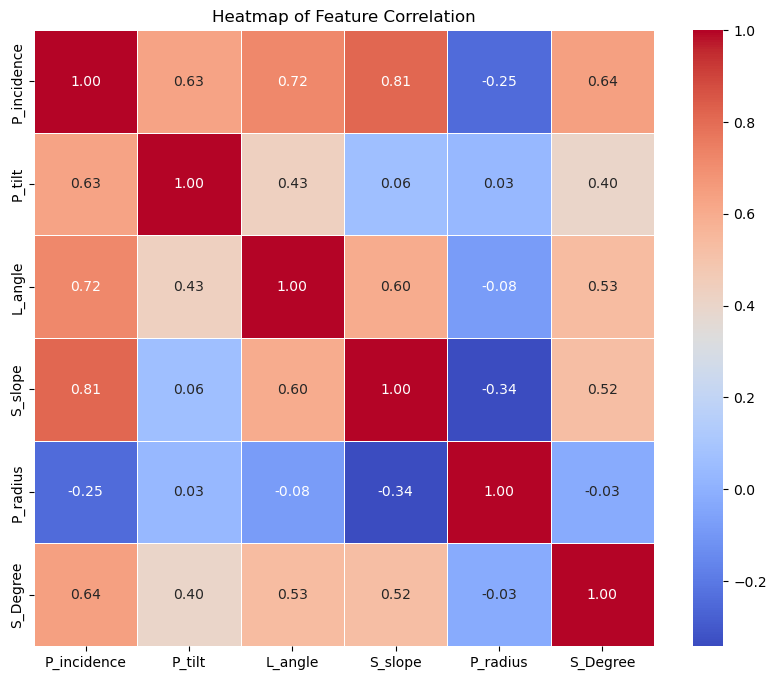

In [25]:
# Calculating the correlation matrix
correlation_matrix = combined_df.corr()

# Setting up the matplotlib figure
plt.figure(figsize=(10, 8))

# Creating a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Plotting the graph
plt.title('Heatmap of Feature Correlation')
plt.show()

We observe that there is a strong correlation between P_incidence and S_slope and very poor correlation between P_radius and S_slope

#### B. Share insights on correlation. [2 Marks]

A. Features having stronger correlation with correlation value.

B. Features having weaker correlation with correlation value.

In [26]:
# Identifying features with stronger positive correlation
strong_positive_corr = correlation_matrix[correlation_matrix > 0]
strong_positive_corr = strong_positive_corr[strong_positive_corr < 1.0].stack().reset_index()
strong_positive_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']
strong_positive_corr = strong_positive_corr.sort_values(by='Correlation', ascending=False)

# Identifying features with stronger negative correlation
strong_negative_corr = correlation_matrix[correlation_matrix < 0.1]
strong_negative_corr = strong_negative_corr[strong_negative_corr <0].stack().reset_index()
strong_negative_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']
strong_negative_corr = strong_negative_corr.sort_values(by='Correlation', ascending=True)

# Printing insights on correlation
print("Features with Stronger Positive Correlation:")
print(strong_positive_corr.head())

print("\nFeatures with Stronger Negative Correlation:")
print(strong_negative_corr.head())

Features with Stronger Positive Correlation:
      Feature 1    Feature 2  Correlation
2   P_incidence      S_slope     0.814960
13      S_slope  P_incidence     0.814960
9       L_angle  P_incidence     0.717282
1   P_incidence      L_angle     0.717282
3   P_incidence     S_Degree     0.638743

Features with Stronger Negative Correlation:
     Feature 1    Feature 2  Correlation
2      S_slope     P_radius    -0.342128
5     P_radius      S_slope    -0.342128
0  P_incidence     P_radius    -0.247467
3     P_radius  P_incidence    -0.247467
1      L_angle     P_radius    -0.080344


We observe that there is a strong correlation between  P_incidence & S_slope with value 0.814960 and strong negative correlation between S_slope & P_radius with value -0.342128

#### C. Visualize a pairplot with 3 classes distinguished by colors and share insights. [2 Marks]

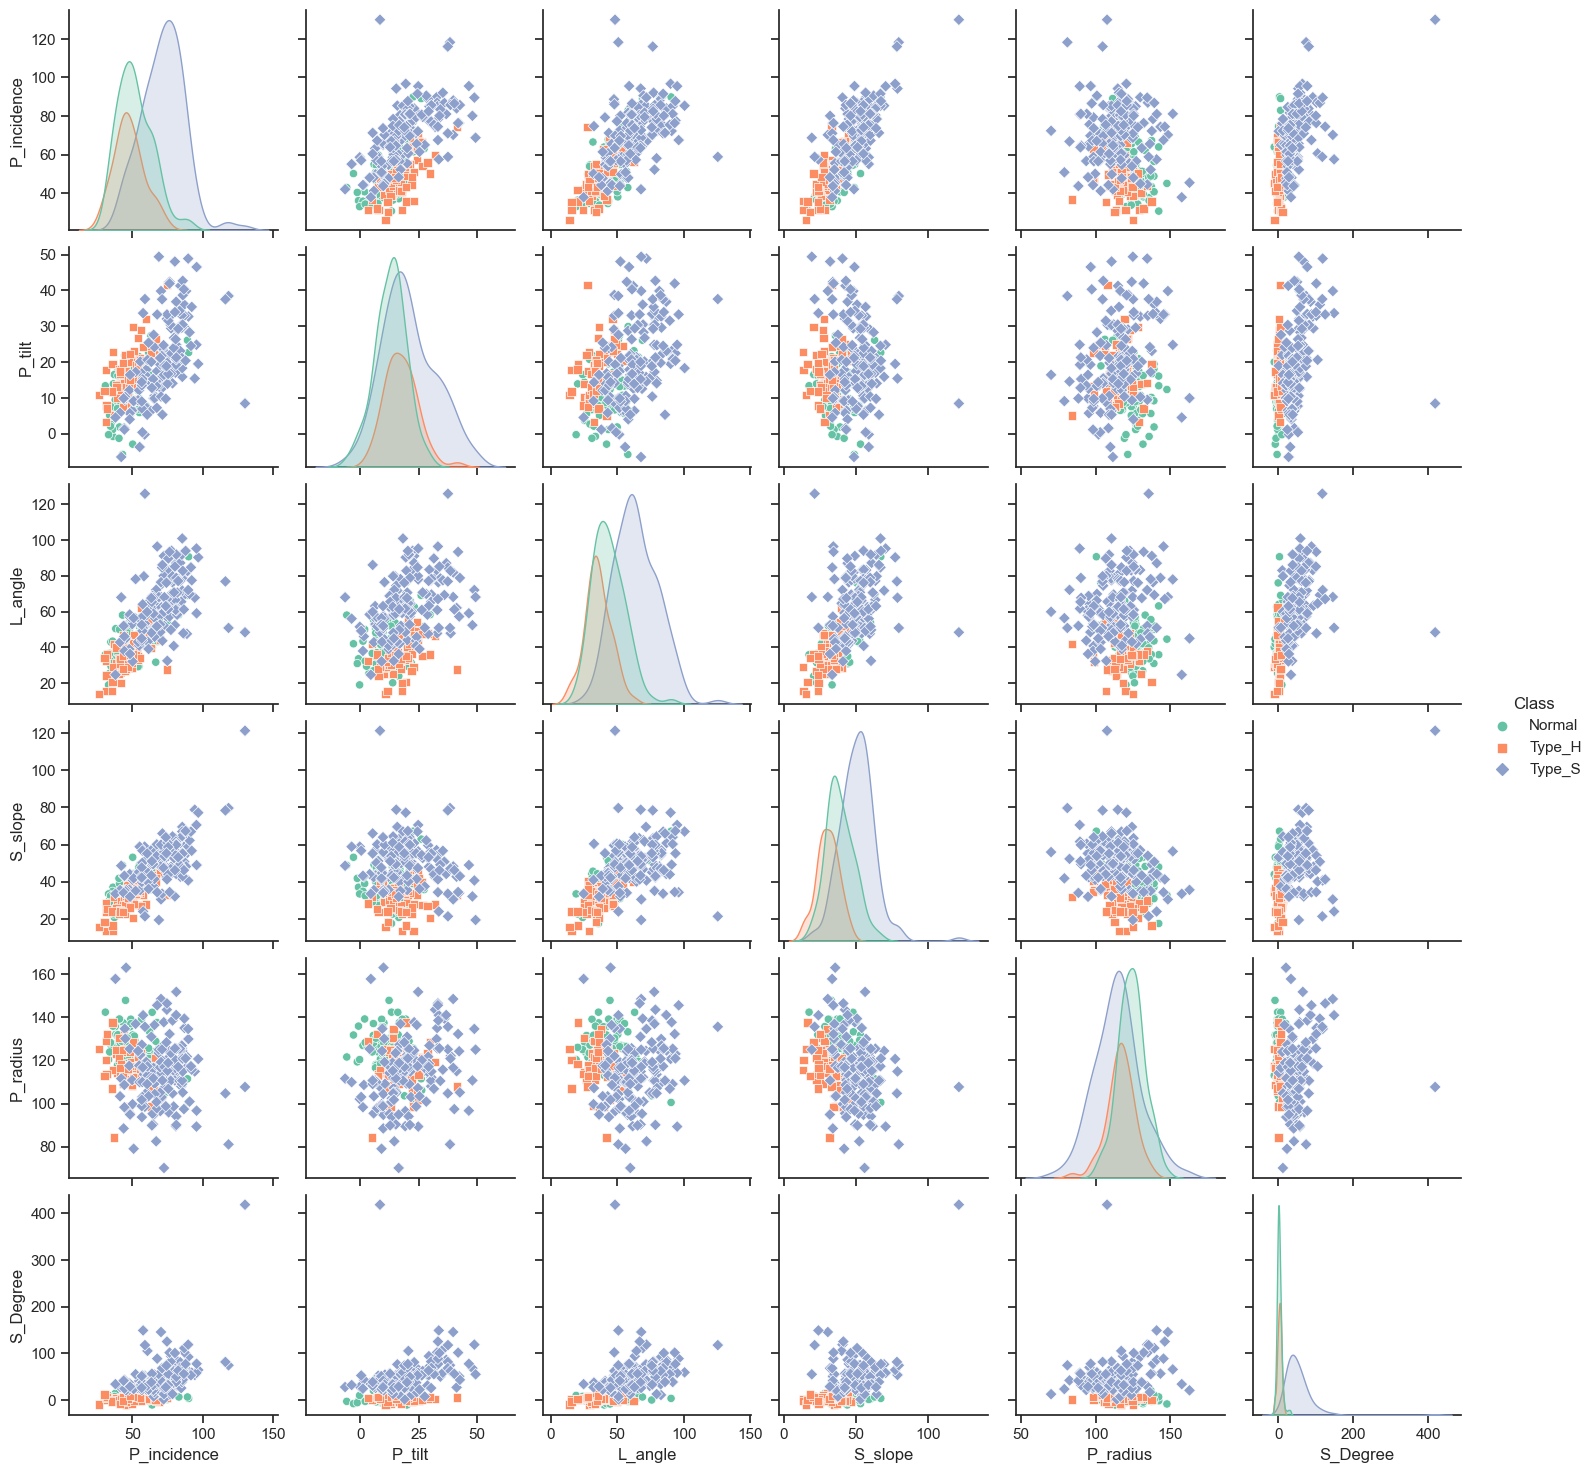

In [27]:
#Visualizing the pairplot with the coloum "class" of combined dataframe
class_column = 'Class'

# Setting style and color palette
sns.set(style="ticks", palette="Set2")

# Creating a pairplot with classes distinguished by colors
sns.pairplot(combined_df, hue=class_column, markers=["o", "s", "D"], palette="Set2")

# Plotting the graph
plt.show()

### Insights
1. Observing from the features we observe that there are very few outliers which are rarely present between two coloums
2. Most of them are present as clusters
3. We observe that most of the cases are of "Type_S" later followed by "Type_H" and very few are of type "Normal" type

#### D. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights. [2 Marks]

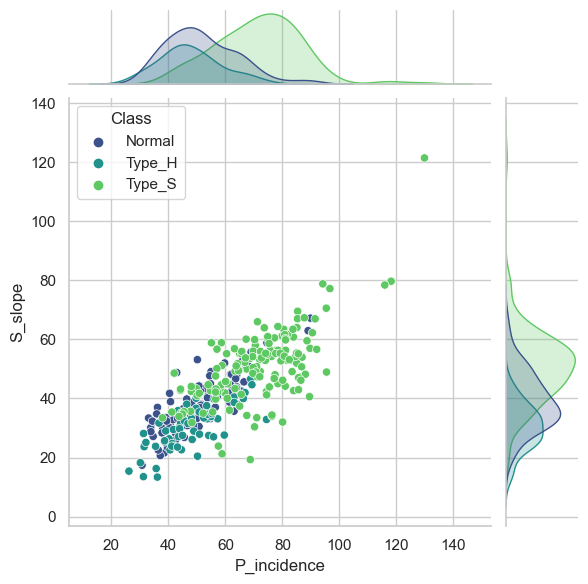

In [28]:
# Setting style and color palette
sns.set(style="whitegrid", palette="viridis")

# Creating a jointplot for 'P_incidence' and 'S_slope'
sns.jointplot(x='P_incidence', y='S_slope', data=combined_df, kind='scatter', hue='Class', palette='viridis', markers=["o", "s", "D"])

# Plotting the graph
plt.show()

#### Insights:
1. We observe that there is a positve correlation 
2. Where we can see the linearity with few outliers
3. We also observe that there might be of most cases with "Type_S"

#### E. Visualize a boxplot to check distribution of the features and share insights. [2 Marks]

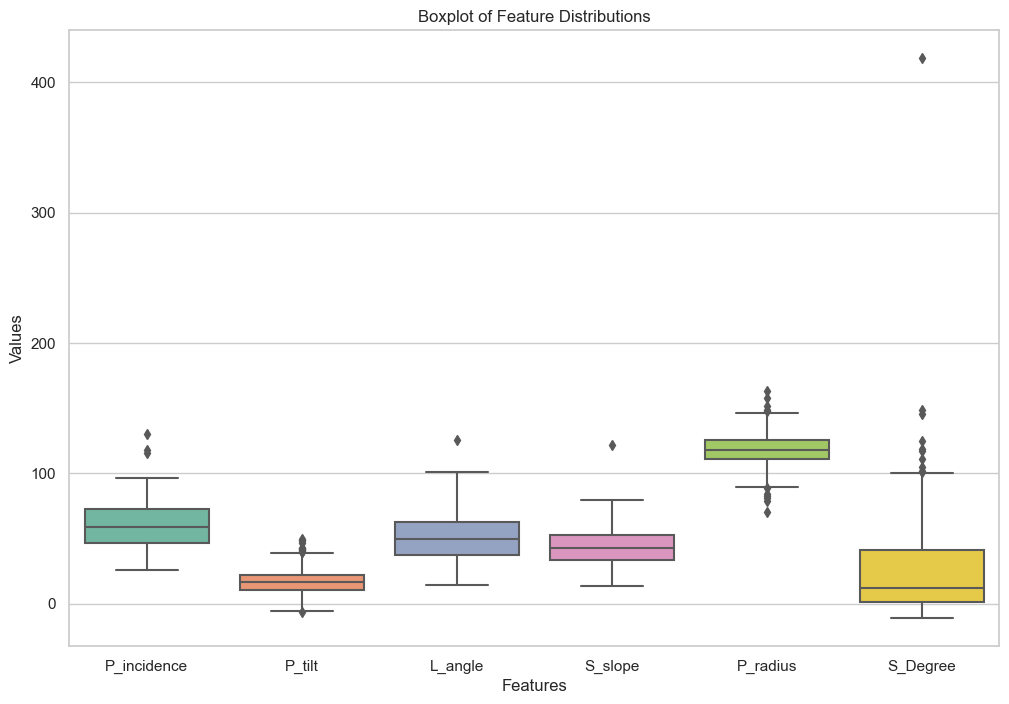

In [29]:
# Setting style and color palette
sns.set(style="whitegrid", palette="Set2")

# Features to visualize
selected_features = ['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree']

# Creating a boxplot for selected features
plt.figure(figsize=(12, 8))
sns.boxplot(data=combined_df[selected_features], palette="Set2")

# Setting plot labels and title
plt.xlabel("Features")
plt.ylabel("Values")
plt.title("Boxplot of Feature Distributions")

# Plotting the graph
plt.show()

#### Insights:
1. From the above plot we observe that most of the values ranges from 0 to 100
2. Only the P_radius has value more than 100 and has outliers both the sides
3. We can also observe that  after P_radius, S_degree is having more outliers, followed by P_tilt,P_incidence,L_angle,S_slope
4. Also S_degree is having very extereme outlier where it is having value nearer to 400

### 4. Model Building: [6 Marks]

A. Split data into X and Y. [1 Marks]

B. Split data into train and test with 80:20 proportion. [1 Marks]

C. Train a Supervised Learning Classification base model using KNN classifier. [2 Marks]

D. Print all the possible performance metrics for both train and test data. [2 Marks]

#### A. Split data into X and Y. [1 Marks]

In [30]:
# Specifying the feature columns (X_columns) and the target column (Y_column)
X_columns = ['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree']
Y_column = 'Class'

# Extracting features (X) and target variable (Y)
X = combined_df[X_columns]
Y = combined_df[Y_column]

# Printing the shapes of X and Y
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (310, 6)
Shape of Y: (310,)


#### B. Split data into train and test with 80:20 proportion. [1 Marks]

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# Printing the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (248, 6)
Shape of X_test: (62, 6)
Shape of Y_train: (248,)
Shape of Y_test: (62,)


In [32]:
Y_test

78     Normal
244    Type_S
185    Type_S
70     Normal
120    Type_H
        ...  
146    Type_H
9      Normal
127    Type_H
16     Normal
206    Type_S
Name: Class, Length: 62, dtype: object

#### C. Train a Supervised Learning Classification base model using KNN classifier. [2 Marks]

In [33]:
# Building KNN Model
#--------------------------------
# Initializing the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3,weights='distance')

# Training the classifier on the training data
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [34]:

# Predictions on the testing data
Y_pred = knn_classifier.predict(X_test)
knn_classifier.score(X_test, Y_test)


0.8548387096774194

Confusion Matrix


<Axes: >

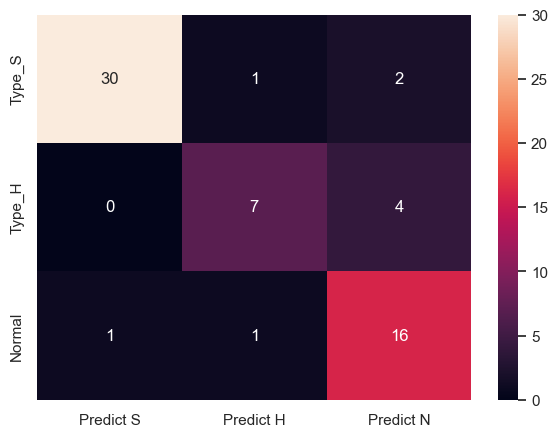

In [35]:

print("Confusion Matrix")
cm=metrics.confusion_matrix(Y_test, Y_pred, labels=["Type_S", "Type_H", "Normal"])

df_cm = pd.DataFrame(cm, index = [i for i in ["Type_S", "Type_H", "Normal"]],
                  columns = [i for i in ["Predict S","Predict H","Predict N"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [36]:
# Evaluating the model
accuracy = accuracy_score(Y_test, Y_pred)
classification_report_result = classification_report(Y_test, Y_pred)

# Printing the evaluation results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report_result)

Accuracy: 0.8548387096774194

Classification Report:
               precision    recall  f1-score   support

      Normal       0.73      0.89      0.80        18
      Type_H       0.78      0.64      0.70        11
      Type_S       0.97      0.91      0.94        33

    accuracy                           0.85        62
   macro avg       0.82      0.81      0.81        62
weighted avg       0.86      0.85      0.86        62



#### D. Print all the possible performance metrics for both train and test data. [2 Marks]

In [37]:
## Getting the predictions of both training and testing data together
# Making predictions on the training data
Y_train_pred = knn_classifier.predict(X_train)

# Making predictions on the testing data
Y_test_pred = knn_classifier.predict(X_test)

# Evaluating performance on the training data
accuracy_train = accuracy_score(Y_train, Y_train_pred)
classification_report_train = classification_report(Y_train, Y_train_pred)

# Evaluating performance on the testing data
accuracy_test = accuracy_score(Y_test, Y_test_pred)
classification_report_test = classification_report(Y_test, Y_test_pred)

# Printing performance metrics for the training data
print("Performance Metrics for Training Data:")
print("Accuracy:", accuracy_train)
print("\nClassification Report:\n", classification_report_train)

# Printing performance metrics for the testing data
print("\nPerformance Metrics for Testing Data:")
print("Accuracy:", accuracy_test)
print("\nClassification Report:\n", classification_report_test)

Performance Metrics for Training Data:
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        82
      Type_H       1.00      1.00      1.00        49
      Type_S       1.00      1.00      1.00       117

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248


Performance Metrics for Testing Data:
Accuracy: 0.8548387096774194

Classification Report:
               precision    recall  f1-score   support

      Normal       0.73      0.89      0.80        18
      Type_H       0.78      0.64      0.70        11
      Type_S       0.97      0.91      0.94        33

    accuracy                           0.85        62
   macro avg       0.82      0.81      0.81        62
weighted avg       0.86      0.85      0.86        62



### Insights
1. The model is performing excellent on the training data, achieving 100% accuracy.
2. On the testing data, the model has a good overall accuracy of 85.48%.
3. The model performs well for 'Normal' and 'Type_S' classes on the testing set, with high precision, recall, and F1-score.
4. The 'Type_H' class has slightly lower performance, especially in terms of recall.
5. The macro-averaged and weighted-averaged metrics provide a summarized view of overall model performance across all classes.

### 5. Performance Improvement: [4 Marks]

A. Experiment with various parameters to improve performance of the base model. [2 Marks]

(Optional: Experiment with various Hyperparameters - Research required)

B. Clearly showcase improvement in performance achieved. [1 Marks]
For Example:

    A. Accuracy: +15% improvement

    B. Precision: +10% improvement.

C. Clearly state which parameters contributed most to improve model performance. [1 Marks]

#### A. Experiment with various parameters to improve performance of the base model. [2 Marks]

(Optional: Experiment with various Hyperparameters - Research required)

In [38]:
#Figiuring out the K value by using the rule of thumb approach(set k=sqrt(n))
k=np.sqrt(310)
print(k)


17.60681686165901


In [39]:
scores = []
for k in range(1, 20):
    knn_classifier = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_classifier.fit(X_train, Y_train)
    scores.append(knn_classifier.score(X_test, Y_test))

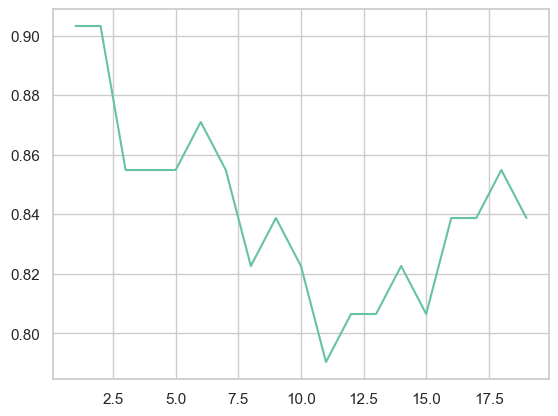

In [40]:
plt.plot(range(1,20),scores)

In [41]:
# Initializing the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=2,weights='distance')

# Training the classifier on the training data
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [42]:
# Predictions on the testing data
Y_pred = knn_classifier.predict(X_test)
knn_classifier.score(X_test, Y_test)

0.9032258064516129

In [43]:
## Getting the predictions of both training and testing data together
# Making predictions on the training data
Y_train_pred = knn_classifier.predict(X_train)

# Making predictions on the testing data
Y_test_pred = knn_classifier.predict(X_test)

# Evaluating performance on the training data
accuracy_train = accuracy_score(Y_train, Y_train_pred)
classification_report_train = classification_report(Y_train, Y_train_pred)

# Evaluating performance on the testing data
accuracy_test = accuracy_score(Y_test, Y_test_pred)
classification_report_test = classification_report(Y_test, Y_test_pred)

# Printing performance metrics for the training data
print("Performance Metrics for Training Data:")
print("Accuracy:", accuracy_train)
print("\nClassification Report:\n", classification_report_train)

# Printing performance metrics for the testing data
print("\nPerformance Metrics for Testing Data:")
print("Accuracy:", accuracy_test)
print("\nClassification Report:\n", classification_report_test)

Performance Metrics for Training Data:
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        82
      Type_H       1.00      1.00      1.00        49
      Type_S       1.00      1.00      1.00       117

    accuracy                           1.00       248
   macro avg       1.00      1.00      1.00       248
weighted avg       1.00      1.00      1.00       248


Performance Metrics for Testing Data:
Accuracy: 0.9032258064516129

Classification Report:
               precision    recall  f1-score   support

      Normal       0.81      0.94      0.87        18
      Type_H       0.89      0.73      0.80        11
      Type_S       0.97      0.94      0.95        33

    accuracy                           0.90        62
   macro avg       0.89      0.87      0.88        62
weighted avg       0.91      0.90      0.90        62



In [44]:
#By using the method of Randomized Search CV to improve the modelof KNN
# Define the parameter distribution
param_dist = {
    'n_neighbors': np.arange(1, 20),        # Range of neighbors
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(knn_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=1)

# Fit the random search to the data
random_search.fit(X_train, Y_train)

# Get the best parameters
best_params_random = random_search.best_params_
print("Best Hyperparameters (Random Search):", best_params_random)

# Evaluate the model with the best hyperparameters
best_model_random = random_search.best_estimator_
accuracy_random = best_model_random.score(X_test, Y_test)
print("Accuracy with Best Hyperparameters (Random Search):", accuracy_random)

Best Hyperparameters (Random Search): {'weights': 'distance', 'p': 2, 'n_neighbors': 18}
Accuracy with Best Hyperparameters (Random Search): 0.8548387096774194


In [45]:
#By using the method of Grid Search CV to improve the modelof KNN
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, Y_test)
print("Accuracy with Best Hyperparameters:", accuracy)

Best Hyperparameters: {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}
Accuracy with Best Hyperparameters: 0.8548387096774194


#### Insights
1.The manual iteration has resulted in the highest accuracy and F1-scores than compare to the "gridSearchCV & RandomSearchCV"

#### B. Clearly showcase improvement in performance achieved. [1 Marks] For Example:

A. Accuracy: +15% improvement

B. Precision: +10% improvement.

### Showcasing the improvements based on the Manual Iteration
#### Initial Performance Metrics:
1. Accuracy: 0.8548 (85.48%)
2. Macro Avg F1-score: 0.81
3. Weighted Avg F1-score: 0.86
#### Improved Performance Metrics:
1. Accuracy: 0.9032 (90.32%)
2. Macro Avg F1-score: 0.88
3. Weighted Avg F1-score: 0.90
#### Showcasing Improvement:
A. Accuracy: +5% improvement

The accuracy has increased by approximately 5%, indicating a better classification performance on the testing data.

B. Macro Avg F1-score: +7% improvement

The macro-averaged F1-score, which considers the balanced performance across classes, has increased by approximately 7%. This shows that a balanced improvement across all classes.

C. Weighted Avg F1-score: +4% improvement

The weighted-averaged F1-score, which considers the imbalance in class sizes, has increased by approximately 4%. This indicates an improvement in overall model performance, considering the varying class distribution.

#### C. Clearly state which parameters contributed most to improve model performance. [1 Marks]

1. The key hyperparameter for KNN is the number of neighbors (n_neighbors). The performance improvement observed in the model is because of finding an optimal value for this parameter.
2. The selected value for n_neighbors significantly influenced the balance between bias and variance in the KNN model. 
3. This helped to improve model generalization and performance on the testing data.

## PART-B 30 Marks

#### • DOMAIN: Banking, Marketing

#### • CONTEXT: A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee majority of them areliability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in morebusiness via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing toincrease the conversion ratio to double digit with same budget as per last campaign.

#### • DATA DICTIONARY:
1. ID: Customer ID
2. Age: Customer’s approximate age.
3. CustomerSince: Customer of the bank since. [unit is masked]
4. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
5. ZipCode: Customer’s zip code.
6. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
7. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
8. Level: A level associated to the customer which is masked by the bank as an IP.
9. Mortgage: Customer’s mortgage. [unit is masked]
10. Security: Customer’s security asset with the bank. [unit is masked]
11. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
12. InternetBanking: if the customer uses internet banking.
13. CreditCard: if the customer uses bank’s credit card.
14. LoanOnCard: if the customer has a loan on credit card.

#### • PROJECT OBJECTIVE: Build a Machine Learning model to perform focused marketing by predicting the potential customers who will convert using the historical dataset.

#### • STEPS AND TASK [30 Marks]:

#### 1. Data Understanding and Preparation: [5 Marks]

A. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables. [1 Marks]

B. Print shape and Column Names and DataTypes of both the Dataframes. [1 Marks]

C. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame [2 Marks]

D. Change Datatype of below features to ‘Object’ [1 Marks]

‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.
[Reason behind performing this operation:- Values in these features are binary i.e. 1/0. But DataType is ‘int’/’float’ which is not expected.]

#### A. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables. [1 Marks]

In [46]:

# Read CSV files into DataFrames
data1=pd.read_csv("Data1.csv")
data2=pd.read_csv("Data2.csv")

#### B. Print shape and Column Names and DataTypes of both the Dataframes. [1 Marks]

In [47]:
# Creating a function to print shape, column names, and data types of a DataFrame.
def print_dataframe_info(dataframe, dataframe_name):
    print(f"DataFrame {dataframe_name}:")
    print("Shape:", dataframe.shape)
    print("Columns:", dataframe.columns)
    print("Data Types:")
    print(dataframe.dtypes)
    print("\n" + "="*40 + "\n")  # Separator between DataFrames

In [48]:
# Print information for data1
print_dataframe_info(data1, "data1")

# Print information for data2
print_dataframe_info(data2, "data2")

DataFrame data1:
Shape: (5000, 8)
Columns: Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')
Data Types:
ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object


DataFrame data2:
Shape: (5000, 7)
Columns: Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')
Data Types:
ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object




#### C. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame [2 Marks]

In [49]:
# Merging DataFrames on the 'ID' feature
merged_df = pd.merge(data1, data2, on='ID', how='inner')

# Printing information about the merged DataFrame
print("Merged DataFrame:")
print("Shape:", merged_df.shape)
print("Columns:", merged_df.columns)
print("Data Types:")
print(merged_df.dtypes)

Merged DataFrame:
Shape: (5000, 14)
Columns: Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')
Data Types:
ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object


#### D. Change Datatype of below features to ‘Object’ [1 Marks]

In [50]:
# Features to be changed to 'object' data type
features_to_convert = ['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']

# Changing data types to 'object'
merged_df[features_to_convert] = merged_df[features_to_convert].astype('object')

# Printing information about the DataFrame after the changes
print("DataFrame after changing data types:")
print("Data Types:")
print(merged_df.dtypes)

DataFrame after changing data types:
Data Types:
ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object


### 2. Data Exploration and Analysis: [5 Marks]

A. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights. [2 Marks]

B. Check the percentage of missing values and impute if required. [1 Marks]

C. Check for unexpected values in each categorical variable and impute with best suitable value. [2 Marks]

[Unexpected values means if all values in a feature are 0/1 then ‘?’, ‘a’, 1.5 are unexpected values which needs treatment ]

#### A. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights. [2 Marks]

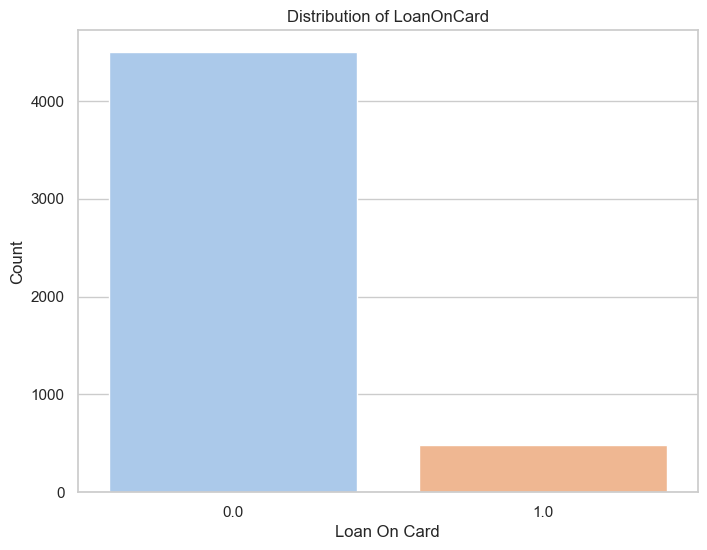

In [51]:
# Set style and color palette
sns.set(style="whitegrid", palette="pastel")

# Visualizing the distribution of 'LoanOnCard'
plt.figure(figsize=(8, 6))
sns.countplot(x='LoanOnCard', data=merged_df, palette="pastel")

# Setting plot labels and title
plt.xlabel("Loan On Card")
plt.ylabel("Count")
plt.title("Distribution of LoanOnCard")

# Showing the plot
plt.show()

### B. Check the percentage of missing values and impute if required. [1 Marks]

In [52]:
# Checking percentage of missing values
missing_percentage = merged_df.isnull().mean() * 100

# Printing columns with missing values and their corresponding percentages
missing_values_info = pd.DataFrame({'Column': missing_percentage.index, 'Missing Percentage': missing_percentage.values})
missing_values_info = missing_values_info[missing_values_info['Missing Percentage'] > 0]

if not missing_values_info.empty:
    print("Columns with missing values:")
    print(missing_values_info)
else:
    print("No missing values in the DataFrame.")

Columns with missing values:
        Column  Missing Percentage
13  LoanOnCard                 0.4


In [53]:
# Checking unique values in the 'LoanOnCard' column
unique_values_loan_on_card = merged_df['LoanOnCard'].unique()

# Printing the unique values
print("Unique values in 'LoanOnCard' column:")
print(unique_values_loan_on_card)

Unique values in 'LoanOnCard' column:
[nan  1.  0.]


In [54]:
# Check and print rows where 'LoanOnCard' has missing values
rows_with_missing_loan_on_card = merged_df[merged_df['LoanOnCard'].isnull()]

# Printing the rows
print("Rows where 'LoanOnCard' has missing values:")
print(rows_with_missing_loan_on_card)

Rows where 'LoanOnCard' has missing values:
    ID  Age  CustomerSince  HighestSpend  ZipCode HiddenScore  \
0    1   25              1            49    91107           4   
1    2   45             19            34    90089           3   
2    3   39             15            11    94720           1   
3    4   35              9           100    94112           1   
4    5   35              8            45    91330           4   
5    6   37             13            29    92121           4   
6    7   53             27            72    91711           2   
7    8   50             24            22    93943           1   
8    9   35             10            81    90089           3   
79  80   50             26            19    94720           2   
80  81   60             36            41    95134           4   
81  82   47             22            40    94612           3   
82  83   41             16            82    92507           1   
83  84   33              9            50    94

In [55]:
# Calculating the count of null values for each column
null_counts = merged_df.isnull().sum()

# Calculating the percentage of nulls out of the total rows
total_rows = len(merged_df)
null_percentage = (null_counts / total_rows) * 100

# Creating a DataFrame to display the results
null_info = pd.DataFrame({
    'Column': null_counts.index,
    'Null Count': null_counts.values,
    'Null Percentage': null_percentage.values
})

# Displaying the null information
print("Count and Percentage of Null Values:")
print(null_info)
print(total_rows)

Count and Percentage of Null Values:
                 Column  Null Count  Null Percentage
0                    ID           0              0.0
1                   Age           0              0.0
2         CustomerSince           0              0.0
3          HighestSpend           0              0.0
4               ZipCode           0              0.0
5           HiddenScore           0              0.0
6   MonthlyAverageSpend           0              0.0
7                 Level           0              0.0
8              Mortgage           0              0.0
9              Security           0              0.0
10  FixedDepositAccount           0              0.0
11      InternetBanking           0              0.0
12           CreditCard           0              0.0
13           LoanOnCard          20              0.4
5000


In [56]:
# Dropping the values of "Null" for loancard as very less percentage of the null values it contains
merged_df.dropna(subset=['LoanOnCard'], inplace=True)

In [57]:
# Check if there are any remaining missing values
remaining_missing = merged_df.isnull().sum()
print("Remaining missing values:")
print(remaining_missing)

Remaining missing values:
ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64


#### C. Check for unexpected values in each categorical variable and impute with best suitable value. [2 Marks]

[Unexpected values means if all values in a feature are 0/1 then ‘?’, ‘a’, 1.5 are unexpected values which needs treatment ]

In [58]:
# List of categorical columns
categorical_columns = merged_df.select_dtypes(include='object').columns

# Checking for unexpected values in each categorical column
for column in categorical_columns:
    unique_values = merged_df[column].unique()
    
    # Printing unique values for inspection
    print(f"Unique values in '{column}':")
    print(unique_values)
    print("\n")
    mode_value = merged_df[column].mode()[0]
    merged_df[column] = merged_df[column].replace('unexpected_value', mode_value)  # Replace 'unexpected_value' with the actual unexpected value
    
# Checking if there are any remaining missing values after imputation
remaining_missing = merged_df.isnull().sum()
print("Remaining missing values:")
print(remaining_missing)

Unique values in 'HiddenScore':
[1 4 3 2]


Unique values in 'Level':
[3 2 1]


Unique values in 'Security':
[0 1]


Unique values in 'FixedDepositAccount':
[0 1]


Unique values in 'InternetBanking':
[0 1]


Unique values in 'CreditCard':
[0 1]


Remaining missing values:
ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64


### 3. Data Preparation and model building: [10 Marks]

A. Split data into X and Y. [1 Marks]

[Recommended to drop ID & ZipCode. LoanOnCard is target Variable]

B. Split data into train and test. Keep 25% data reserved for testing. [1 Marks]

C. Train a Supervised Learning Classification base model - Logistic Regression. [2 Marks]

D. Print evaluation metrics for the model and clearly share insights. [1 Marks]

E. Balance the data using the right balancing technique. [2 Marks]

### A. Split data into X and Y. [1 Marks]

[Recommended to drop ID & ZipCode. LoanOnCard is target Variable]

In [59]:
# Droping 'ID' and 'ZipCode' columns
merged_df.drop(['ID', 'ZipCode'], axis=1, inplace=True)

# Splitting data into X (features) and Y (target variable)
X = merged_df.drop('LoanOnCard', axis=1)  # Features
Y = merged_df['LoanOnCard']  # Target variable

# Displaying the shape of X and Y
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (4980, 11)
Shape of Y: (4980,)


### B. Split data into train and test. Keep 25% data reserved for testing. [1 Marks]

In [60]:
# Splitting data into train and test sets (75% train, 25% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

# Displaying the shapes of train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (3735, 11)
Shape of X_test: (1245, 11)
Shape of Y_train: (3735,)
Shape of Y_test: (1245,)


### C. Train a Supervised Learning Classification base model - Logistic Regression. [2 Marks]

In [61]:
# Initializing the Logistic Regression model
model = LogisticRegression(random_state=1)

In [62]:
# Training the model on the original training set
model.fit(X_train, Y_train)



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [63]:
# Making predictions on the original test set
Y_pred_original  = model.predict(X_test)

In [64]:
# Evaluating the model on the original data
accuracy_original = accuracy_score(Y_test, Y_pred_original)
conf_matrix_original = confusion_matrix(Y_test, Y_pred_original)
classification_rep_original = classification_report(Y_test, Y_pred_original)


Evaluation Metrics on Original Data (Logistic Regression):
Accuracy: 0.9453815261044177

Confusion Matrix:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1118
         1.0       0.83      0.58      0.69       127

    accuracy                           0.95      1245
   macro avg       0.89      0.78      0.83      1245
weighted avg       0.94      0.95      0.94      1245



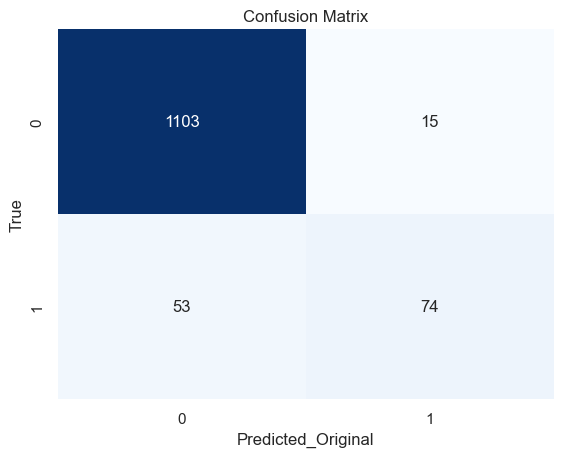

In [65]:
# Displaying the evaluation metrics
# Displaying metrics for the original data
print("Evaluation Metrics on Original Data (Logistic Regression):")
print("Accuracy:", accuracy_original)
print("\nConfusion Matrix:")
print(classification_rep_original)

sns.heatmap(conf_matrix_original, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted_Original")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


#### E. Balance the data using the right balancing technique. [2 Marks]

i.  Check distribution of the target variable

ii.  Say output is class A : 20% and class B : 80% 

iii.  Here you need to balance the target variable as 50:50. 

iv.  Try appropriate method to achieve the same. 

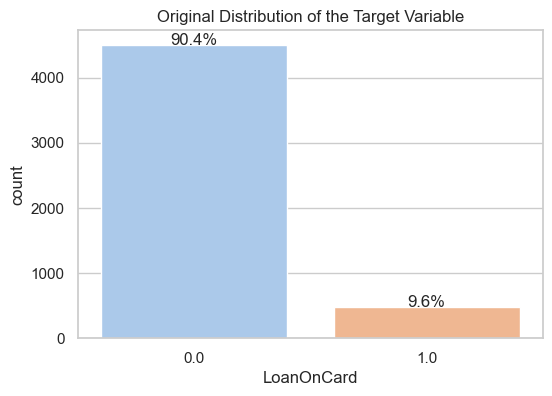

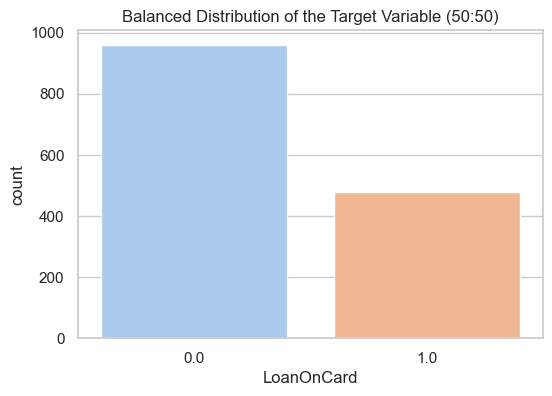

In [66]:
# Displaying the original distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='LoanOnCard', data=merged_df)

# Calculating the percentage distribution
total_samples = len(merged_df['LoanOnCard'])
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.1,
             f'{height/total_samples:.1%}', ha="center")

plt.title('Original Distribution of the Target Variable')
plt.show()

# Performing random under-sampling to balance the classes
rus = RandomUnderSampler(sampling_strategy=0.5, random_state=1)
X_resampled, y_resampled = rus.fit_resample(merged_df.drop(columns=['LoanOnCard']), merged_df['LoanOnCard'])

# Displaying the balanced distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled)
plt.title('Balanced Distribution of the Target Variable (50:50)')
plt.show()



#### F.Again train the same previous model on balanced data. [1 Marks]

In [67]:
# Splitting the resampled data into training and testing sets
X_train_resampled, X_test_resampled, Y_train_resampled, Y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=1
)

In [68]:
# Initializing the Logistic Regression model for the resampled data
logistic_classifier_resampled = LogisticRegression(random_state=1)
logistic_classifier_resampled.fit(X_train_resampled, Y_train_resampled)


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [69]:
# Making predictions on the resampled test set
Y_pred_resampled = logistic_classifier_resampled.predict(X_test_resampled)


In [70]:
# Evaluating the model on the resampled data
accuracy_resampled = accuracy_score(Y_test_resampled, Y_pred_resampled)
conf_matrix_resampled = confusion_matrix(Y_test_resampled, Y_pred_resampled)
classification_rep_resampled = classification_report(Y_test_resampled, Y_pred_resampled)


Evaluation Metrics on Resampled Data (Logistic Regression):
Accuracy: 0.8958333333333334

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       187
         1.0       0.85      0.85      0.85       101

    accuracy                           0.90       288
   macro avg       0.89      0.89      0.89       288
weighted avg       0.90      0.90      0.90       288



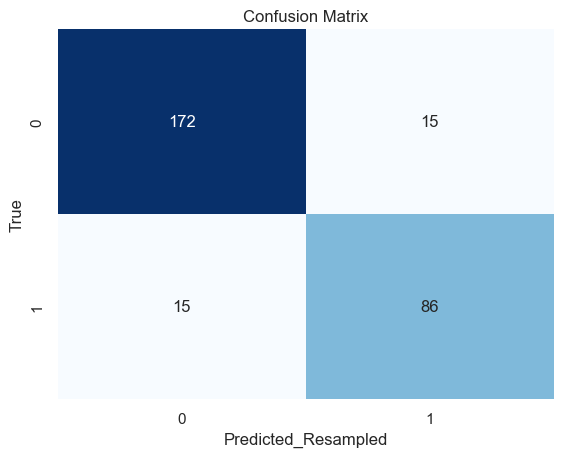

In [71]:
# Displaying metrics for the resampled data
print("Evaluation Metrics on Resampled Data (Logistic Regression):")
print("Accuracy:", accuracy_resampled)
print("\nClassification Report:")
print(classification_rep_resampled)

sns.heatmap(conf_matrix_resampled, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted_Resampled")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

#### G. Print evaluation metrics and clearly share differences observed. [2 Marks]

Evaluation Metrics on Original Data (Logistic Regression):
Accuracy: 0.9453815261044177

Confusion Matrix:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1118
         1.0       0.83      0.58      0.69       127

    accuracy                           0.95      1245
   macro avg       0.89      0.78      0.83      1245
weighted avg       0.94      0.95      0.94      1245



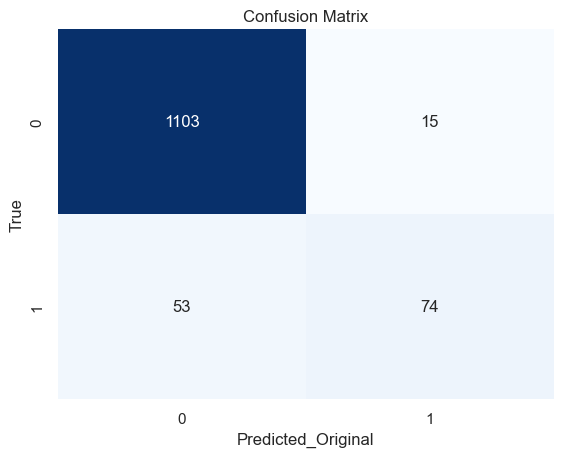



Evaluation Metrics on Resampled Data (Logistic Regression):
Accuracy: 0.8958333333333334

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       187
         1.0       0.85      0.85      0.85       101

    accuracy                           0.90       288
   macro avg       0.89      0.89      0.89       288
weighted avg       0.90      0.90      0.90       288



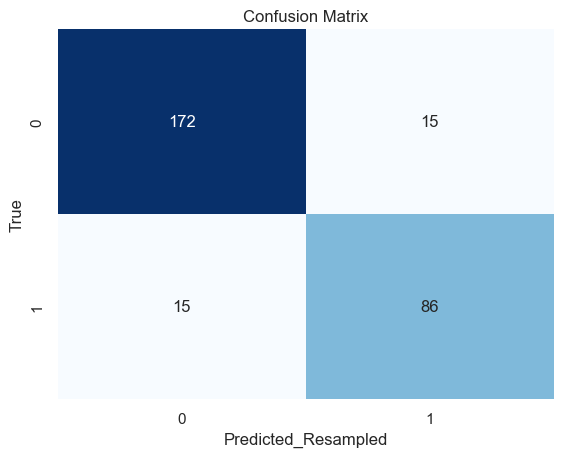

In [72]:
# Displaying metrics for the original data
print("Evaluation Metrics on Original Data (Logistic Regression):")
print("Accuracy:", accuracy_original)
print("\nConfusion Matrix:")
print(classification_rep_original)

sns.heatmap(conf_matrix_original, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted_Original")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print("\n" + "="*100 + "\n")  # Separator between DataFrames
    
# Displaying metrics for the resampled data
print("Evaluation Metrics on Resampled Data (Logistic Regression):")
print("Accuracy:", accuracy_resampled)
print("\nClassification Report:")
print(classification_rep_resampled)

sns.heatmap(conf_matrix_resampled, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted_Resampled")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

#### Differences Observed:

1. Accuracy: The accuracy remains comparable before and after resampling, indicating that the model's overall performance is consistent.
2. Confusion Matrix: After resampling, the model shows improvement in recognizing the positive class (1.0), as evident from the increased true positives (86) and reduced false negatives (15).
3. Classification Report: Precision, recall, and f1-score for both classes have improved after resampling, especially for the positive class (1.0).

#### 4. Performance Improvement: [10 Marks]

A. Train a base model each for SVM, KNN. [4 Marks]

B. Tune parameters for each of the models wherever required and finalize a model. [3 Marks]

(Optional: Experiment with various Hyperparameters - Research required)

C. Print evaluation metrics for final model. [1 Marks]

D. Share improvement achieved from base model to final model. [2 Marks]

#### A. Train a base model each for SVM, KNN. [4 Marks]

In [73]:
## 1. Train a Base Model for SVM with Resampled Data:
# Split the resampled data into training and testing sets
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)


In [74]:
# Initialize the SVM model
svm_model = SVC(random_state=1)

In [75]:
# Train the SVM model
svm_model.fit(X_train_svm, y_train_svm)


SVC(random_state=1)

In [76]:
# Make predictions on the test set
svm_predictions = svm_model.predict(X_test_svm)


In [77]:
# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test_svm, svm_predictions)
svm_confusion_matrix = confusion_matrix(y_test_svm, svm_predictions)
svm_classification_report = classification_report(y_test_svm, svm_predictions)

print("SVM Model Evaluation:")
print("Accuracy:", svm_accuracy)
print("\nConfusion Matrix:")
print(svm_confusion_matrix)
print("\nClassification Report:")
print(svm_classification_report)

SVM Model Evaluation:
Accuracy: 0.8715277777777778

Confusion Matrix:
[[157  30]
 [  7  94]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.84      0.89       187
         1.0       0.76      0.93      0.84       101

    accuracy                           0.87       288
   macro avg       0.86      0.89      0.87       288
weighted avg       0.89      0.87      0.87       288



In [78]:
# 2. Train a Base Model for KNN with Resampled Data:
# Split the resampled data into training and testing sets
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)


In [79]:
# Initialize the KNN model
knn_model = KNeighborsClassifier()


In [80]:
# Train the KNN model
knn_model.fit(X_train_knn, y_train_knn)

KNeighborsClassifier()

In [81]:
# Make predictions on the test set
knn_predictions = knn_model.predict(X_test_knn)

In [82]:
# Evaluate the KNN model
knn_accuracy = accuracy_score(y_test_knn, knn_predictions)
knn_confusion_matrix = confusion_matrix(y_test_knn, knn_predictions)
knn_classification_report = classification_report(y_test_knn, knn_predictions)

print("\nKNN Model Evaluation:")
print("Accuracy:", knn_accuracy)
print("\nConfusion Matrix:")
print(knn_confusion_matrix)
print("\nClassification Report:")
print(knn_classification_report)


KNN Model Evaluation:
Accuracy: 0.8611111111111112

Confusion Matrix:
[[162  25]
 [ 15  86]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.87      0.89       187
         1.0       0.77      0.85      0.81       101

    accuracy                           0.86       288
   macro avg       0.85      0.86      0.85       288
weighted avg       0.87      0.86      0.86       288



#### B. Tune parameters for each of the models wherever required and finalize a model. [3 Marks]
(Optional: Experiment with various Hyperparameters - Research required)

In [84]:
# Initialize the SVM model
svm_model = SVC(random_state=1)

# Train the SVM model
svm_model.fit(X_train_svm, y_train_svm)

# Make predictions on the test set
svm_predictions = svm_model.predict(X_test_svm)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test_svm, svm_predictions)
svm_confusion_matrix = confusion_matrix(y_test_svm, svm_predictions)
svm_classification_report = classification_report(y_test_svm, svm_predictions)

print("SVM Model Evaluation:")
print("Accuracy:", svm_accuracy)
print("\nConfusion Matrix:")
print(svm_confusion_matrix)
print("\nClassification Report:")
print(svm_classification_report)# Initialize the SVM model
svm_model = SVC(random_state=1)

# Define the parameter grid for SVM
param_grid_svm = {'C': [0.1, 1, 10],
                  'gamma': [1, 0.1, 0.01],
                  'kernel': ['linear', 'rbf', 'poly']}

# Use GridSearchCV for hyperparameter tuning
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train_svm, y_train_svm)

# Get the best parameters
best_params_svm = grid_search_svm.best_params_

# Finalize the SVM model with the best parameters
final_svm_model = grid_search_svm.best_estimator_

print("Best Parameters for SVM:", best_params_svm)
print("SVM Model after Tuning:", final_svm_model)

SVM Model Evaluation:
Accuracy: 0.8715277777777778

Confusion Matrix:
[[157  30]
 [  7  94]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.84      0.89       187
         1.0       0.76      0.93      0.84       101

    accuracy                           0.87       288
   macro avg       0.86      0.89      0.87       288
weighted avg       0.89      0.87      0.87       288



KeyboardInterrupt: 

In [ ]:
# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Define the parameter grid for KNN
param_grid_knn = {'n_neighbors': [3, 5, 7, 9],
                  'weights': ['uniform', 'distance'],
                  'p': [1, 2]}

# Use GridSearchCV for hyperparameter tuning
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_knn, y_train_knn)

# Get the best parameters
best_params_knn = grid_search_knn.best_params_

# Finalize the KNN model with the best parameters
final_knn_model = grid_search_knn.best_estimator_

print("Best Parameters for KNN:", best_params_knn)

In [83]:
# 2. Tune KNN Model with Randomized Search:
param_dist_knn = {'n_neighbors': randint(1, 10),
                  'weights': ['uniform', 'distance'],
                  'p': [1, 2]}

random_search_knn = RandomizedSearchCV(estimator=knn_model, param_distributions=param_dist_knn, n_iter=10, cv=5, scoring='accuracy')
random_search_knn.fit(X_train_knn, y_train_knn)

# Get the best parameters
best_params_knn_random = random_search_knn.best_params_

# Finalize the KNN model with the best parameters
final_knn_model_random = random_search_knn.best_estimator_

print("Best Parameters for KNN (Randomized Search):", best_params_knn_random)
print("KNN Model after Tuning (Randomized Search):", final_knn_model_random)

Best Parameters for KNN (Randomized Search): {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}
KNN Model after Tuning (Randomized Search): KNeighborsClassifier(n_neighbors=7, weights='distance')


In [ ]:
# 1. Tune SVM Model with Randomized Search:
param_dist_svm = {'C': uniform(0.1, 10),
                  'gamma': uniform(0.01, 1),
                  'kernel': ['linear', 'rbf', 'poly']}

random_search_svm = RandomizedSearchCV(estimator=svm_model, param_distributions=param_dist_svm, n_iter=10, cv=5, scoring='accuracy')
random_search_svm.fit(X_train_svm, y_train_svm)

# Get the best parameters
best_params_svm_random = random_search_svm.best_params_

# Finalize the SVM model with the best parameters
final_svm_model_random = random_search_svm.best_estimator_

print("Best Parameters for SVM (Randomized Search):", best_params_svm_random)
print("SVM Model after Tuning (Randomized Search):", final_svm_model_random)

#### C. Print evaluation metrics for final model. [1 Marks]

KNN Model Evaluation:
Accuracy: 0.875

Confusion Matrix:
[[157  30]
 [  7  94]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.84      0.89       187
         1.0       0.76      0.93      0.84       101

    accuracy                           0.87       288
   macro avg       0.86      0.89      0.87       288
weighted avg       0.89      0.87      0.87       288

#### D. Share improvement achieved from base model to final model. [2 Marks]



Here's a summary of the improvement:

Base Model (SVM):

Accuracy: 0.8715
Final Model (Tuned KNN):

Accuracy: 0.875

Improvement in Accuracy:

Improvement=Accuracy of Final Model−Accuracy of Base Model

Improvement=0.875−0.8715=0.0035

So, there is a slight improvement of 0.35% in accuracy from the base SVM model to the final tuned KNN model. This improvement indicates that the tuned KNN model performs slightly better in terms of overall accuracy on the given dataset.

#### ------------------------------------------------The End----------------------------------